# Tic-Tac-Toe Plots

## Packages Definition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot 1: The proportion of wins, losses and draws for bots
In this section, we use a pie chart to indicate the proportion of wins/losses/draws for bots in the single player mode Tic-Tac-Toe game database.

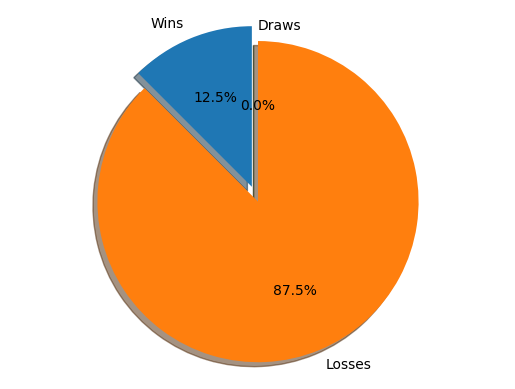

In [2]:
data_df = pd.read_csv("./data/game_log.csv")
bot_wins = 0
bot_losses = 0
bot_draws = 0

for _, row in data_df.iterrows():
    if row["playerO_username"] == "BOT":
        if row["game_result"] == "DRAW":
            bot_draws += 1
        elif row["game_result"] == "O":
            bot_wins += 1
        else:
            bot_losses += 1

# creating the pie chart
labels = 'Wins', 'Losses', 'Draws'
sizes = [bot_wins, bot_losses, bot_draws]
explode = (0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Plot 2: Global Wins Time
In this section, we use a vertical bar chart to show the numbers of wins of different players registered in the Tic-Tac-Toe game.

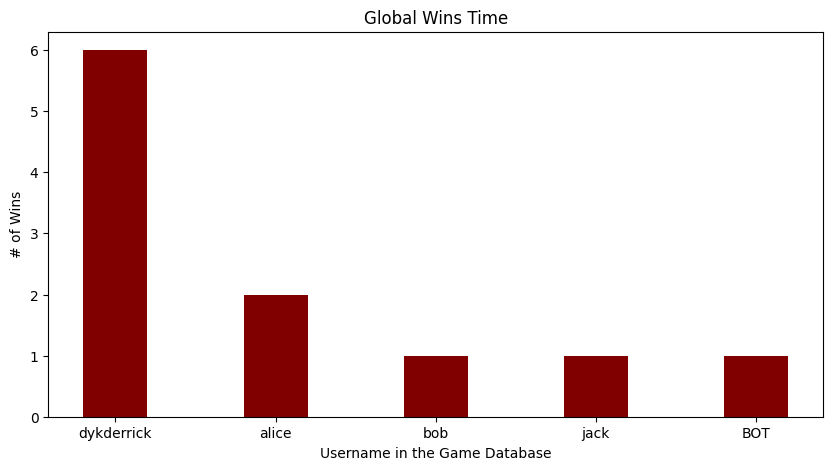

In [3]:
data_df = pd.read_csv("./data/game_log.csv")
user_wins = {}

for _, row in data_df.iterrows():
    current_win_username = None
    
    if row["game_result"] == "X":
        current_win_username = row["playerX_username"]
    elif row["game_result"] == "O":
        current_win_username = row["playerO_username"]
    
    if current_win_username:
        if current_win_username not in user_wins.keys():
            user_wins[current_win_username] = 1
        else:
            user_wins[current_win_username] += 1

user_wins = dict(sorted(user_wins.items(), key=lambda item: item[1], reverse=True))

usernames = list(user_wins.keys())
wins_time = list(user_wins.values())

# creating the bar plot
fig = plt.figure(figsize = (10, 5))

plt.bar(usernames, wins_time, color ='maroon',
        width = 0.4)
 
plt.xlabel("Username in the Game Database")
plt.ylabel("# of Wins")
plt.title("Global Wins Time")
plt.show()


## Plot 3: Game Mode Count
In this section, we make a horizontal bar chart to show how many single player mode game and how many two player mode game were played and stored in the database.

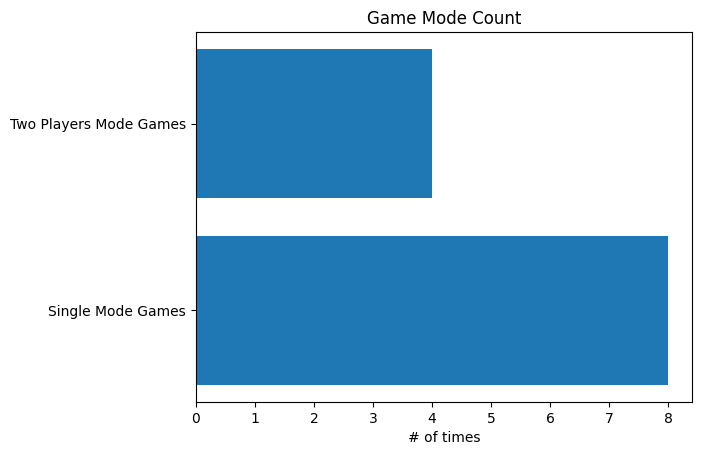

In [4]:
data_df = pd.read_csv("./data/game_log.csv")
one_player_times = 0
two_plaer_times = 0

for _, row in data_df.iterrows():
    if row["playerO_username"] == "BOT":
        one_player_times += 1
    else:
        two_plaer_times += 1

# creating the bar plot
y=['Single Mode Games', 'Two Players Mode Games']


x=[one_player_times, two_plaer_times]
plt.barh(y, x)

plt.xlabel("# of times")
plt.title("Game Mode Count")
plt.show()